# Creating density distribution plots from HADCRUT data

data from https://www.metoffice.gov.uk/hadobs/hadcrut5/index.html

### Setup

In [25]:
import numpy as np
import xarray as xr
import netCDF4
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
def sel_mon(file,mon):
    output=file.where(file.time.dt.month.isin([mon]), drop=True)
    return output

In [27]:
plt.style.use('dark_background')

In [28]:
data_folder="/Volumes/SPARK/hadcrut/monthly/"
plot_folder="/Volumes/SPARK/hadcrut/monthly/plots/"

### Download data

In [10]:
os.chdir(data_folder)

In [11]:
!wget https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc

--2023-07-28 10:38:42--  https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 104.77.20.144
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|104.77.20.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2961377 (2.8M) [application/x-netcdf]
Saving to: 'HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc.1'

HadCRUT.5.0.1.0.ana 100%[===================>]   2.82M  3.02MB/s    in 0.9s    

2023-07-28 10:38:44 (3.02 MB/s) - 'HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc.1' saved [2961377/2961377]



### Postprocess data

In [14]:
ensemblemember_global_monthly_ts=xr.open_dataset("HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc")

In [16]:
ensemblemember_global_monthly_ts_june=sel_mon(ensemblemember_global_monthly_ts,6)

In [17]:
ensemblemember_global_monthly_ts_june_1991=ensemblemember_global_monthly_ts_june.sel(time=slice("1991","2020"))
ensemblemember_global_monthly_ts_june_1994=ensemblemember_global_monthly_ts_june.sel(time=slice("1994","2023"))
ensemblemember_global_monthly_ts_june_1981=ensemblemember_global_monthly_ts_june.sel(time=slice("1981","2010"))
ensemblemember_global_monthly_ts_june_1971=ensemblemember_global_monthly_ts_june.sel(time=slice("1971","2000"))
ensemblemember_global_monthly_ts_june_1961=ensemblemember_global_monthly_ts_june.sel(time=slice("1961","1990"))

### Plotting

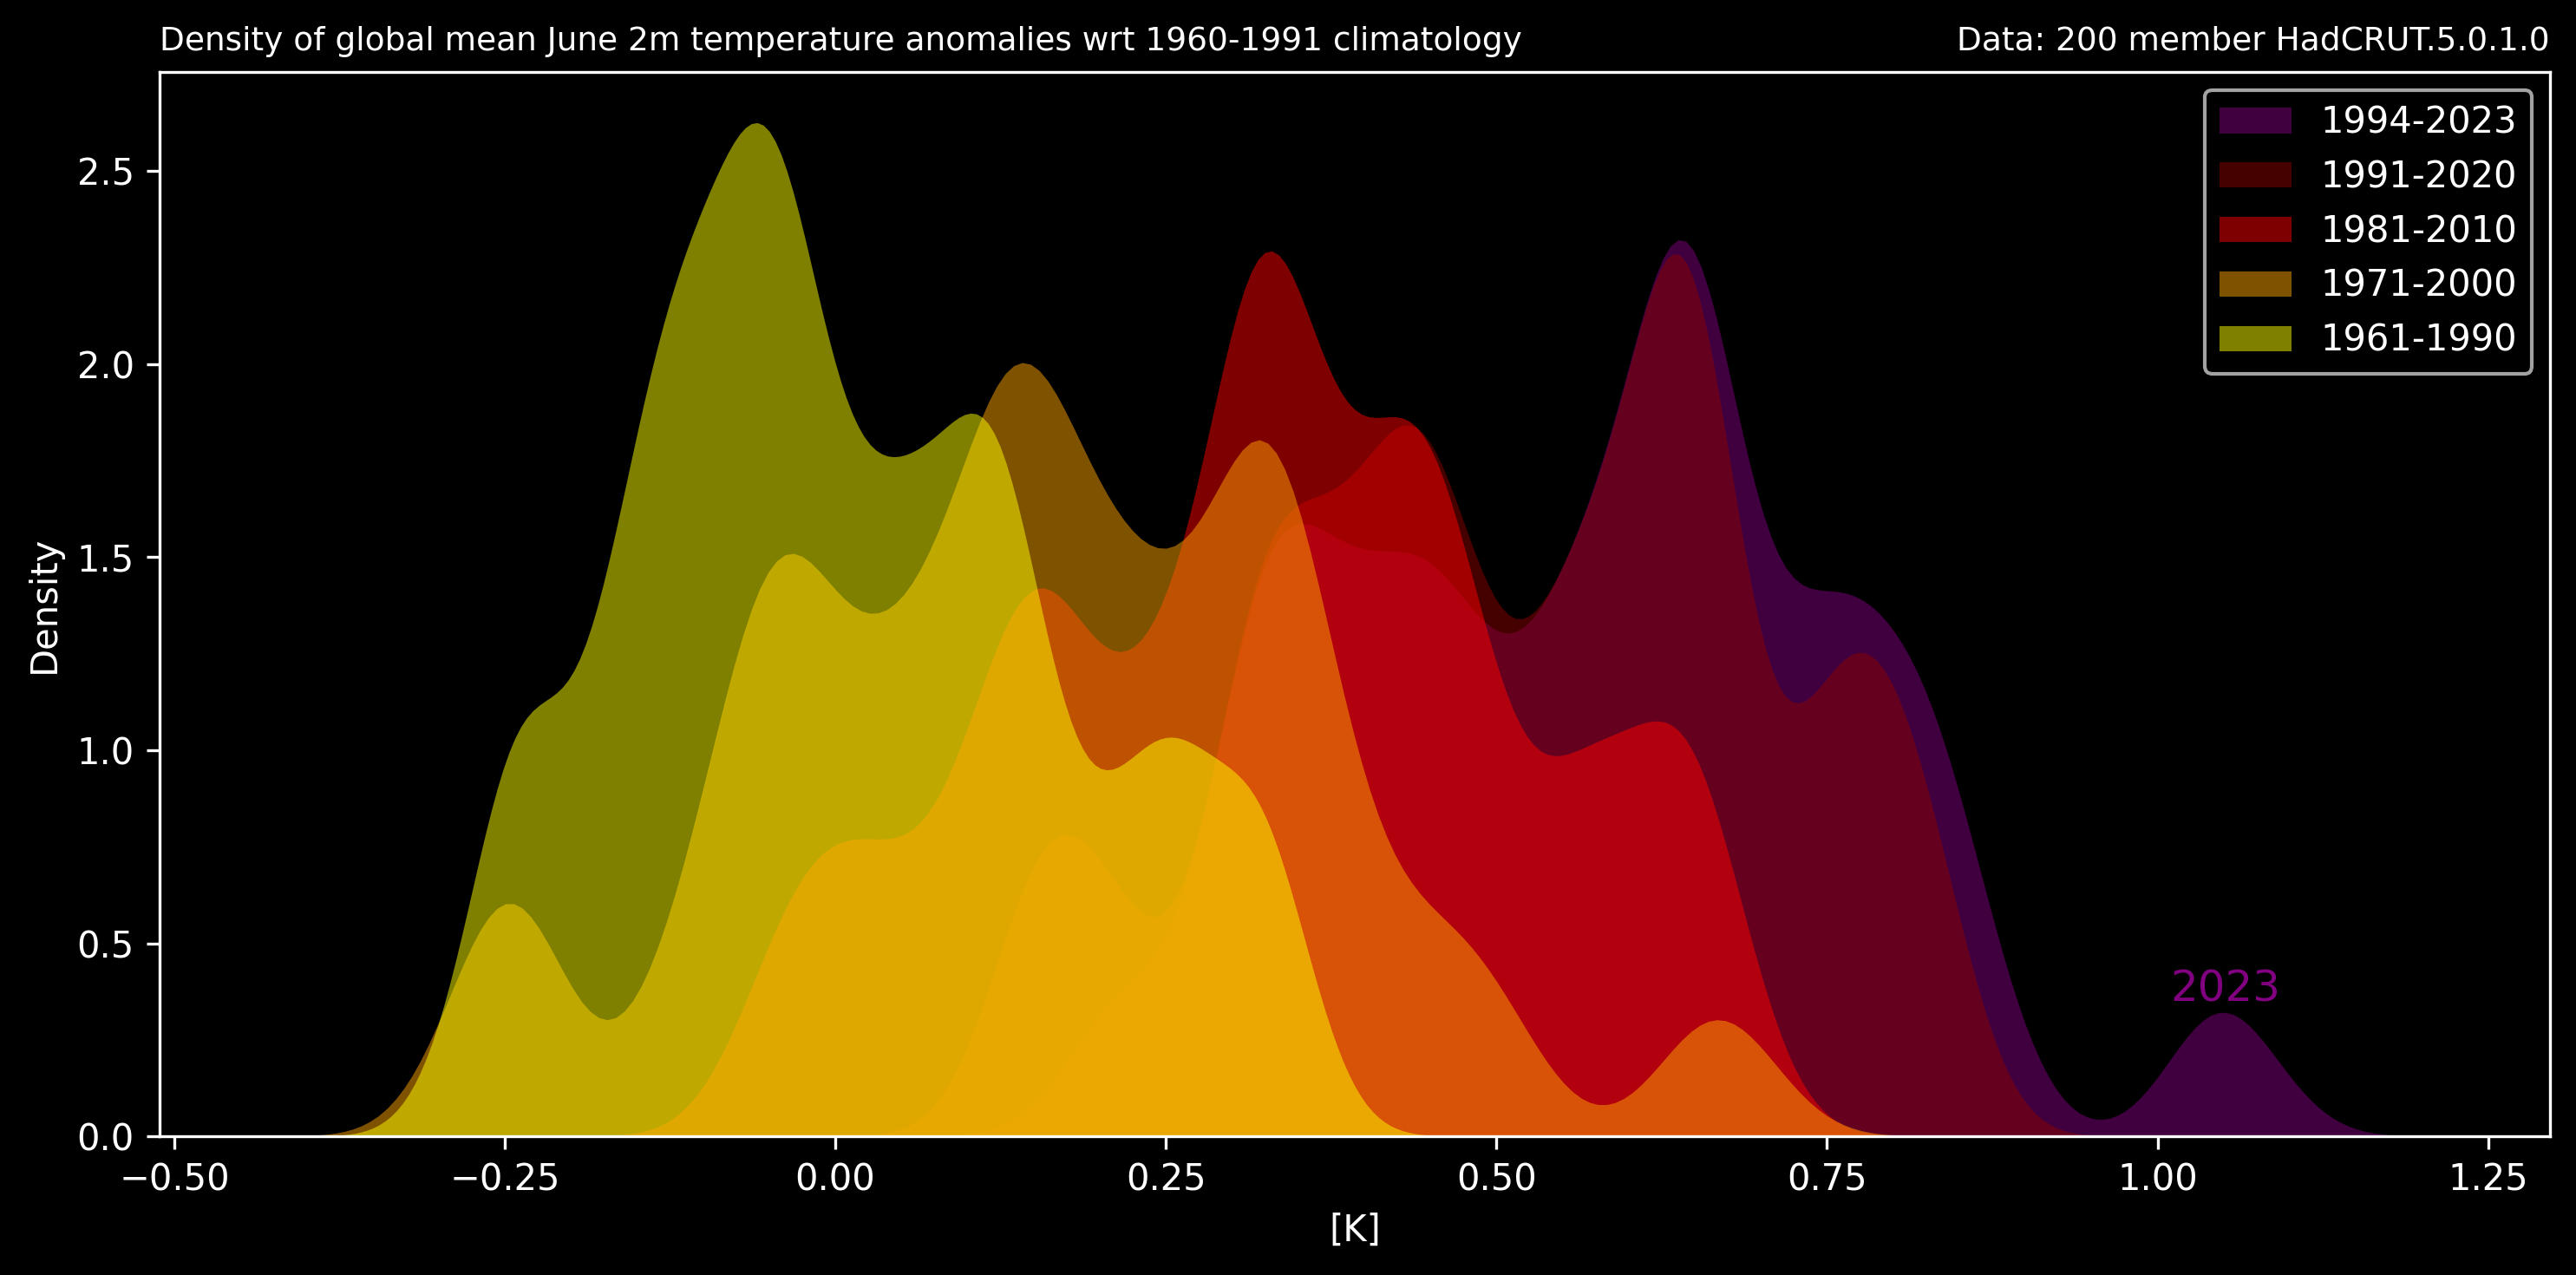

In [24]:
fig = plt.figure(figsize=(10, 5), dpi= 300)
#sns.kdeplot(ensemblemember_global_monthly_ts_june_A.tas.values.reshape(200*30), label='A')
sns.kdeplot(ensemblemember_global_monthly_ts_june_1994.tas.values.reshape(200*30), linewidth=0,fill=True,alpha=0.5, label="1994-2023",color="purple")


sns.kdeplot(ensemblemember_global_monthly_ts_june_1991.tas.values.reshape(200*30), linewidth=0,fill=True,alpha=0.5, label="1991-2020",color="darkred")


sns.kdeplot(ensemblemember_global_monthly_ts_june_1981.tas.values.reshape(200*30), linewidth=0,fill=True,alpha=0.5, label="1981-2010",color="red")
sns.kdeplot(ensemblemember_global_monthly_ts_june_1971.tas.values.reshape(200*30), linewidth=0,fill=True,alpha=0.5, label="1971-2000",color="orange")
sns.kdeplot(ensemblemember_global_monthly_ts_june_1961.tas.values.reshape(200*30), linewidth=0,fill=True,alpha=0.5, label="1961-1990",color="yellow")
plt.legend()
plt.text(x=1.01,y=0.35,s="2023",size=12,color="purple")
plt.title("Density of global mean June 2m temperature anomalies wrt 1960-1991 climatology",loc="left",size=9)
plt.title("Data: 200 member HadCRUT.5.0.1.0",loc="right",size=9)
plt.xlabel("[K]")
plt.tight_layout()

plt.savefig(plot_folder+"hadcrut_june_density.pdf")
plt.savefig(plot_folder+"hadcrut_june_density.png")
plt.show()